<a href="https://colab.research.google.com/github/Stephanomejia17/Actividad_preparatoria_final_poo/blob/master/Copy_of_FisicaComputacional_PlanoInclinado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movimiento a lo largo de un plano inclinado

### Experimento sobre el movimiento en 1D y Análisis de Datos

El movimiento de un bloque que se desliza a lo largo de un plano inclinado se puede estudiar como ejemplo de movimiento unidimensional. En este ejemplo queremos estudiar la posición, la velocidad y la aceleración del cuerpo en función del tiempo.
![](https://drive.google.com/uc?export=view&id=1ovrJWOPsi6Nnyy6D-EoglKAmIDhwK0qB)


El bloque que se desliza sobre el plano inclinado puede describirse como un objeto puntual que se mueve en línea recta. La posición del cuerpo se puede individualizar mediante la coordenada $x$, cuyo valor corresponde en este caso a la distancia entre el objeto y un sensor colocado en un extremo de la pista.


##### 1. Experimento
Preparamos una pista inclinada y un objeto que se puede dejar libre para moverse a lo largo del plano inclinado.

Intentamos realizar el experimento de manera que las **condiciones** del experimento sean **reproducibles**.

Una variable física que caracteriza las condiciones en las que se realiza el experimento es el valor del **ángulo** que forma el plano inclinado con la dirección horizontal.
Podemos medir este ángulo si instalamos en el smartphone la App [phyphox](https://phyphox.org/). Entre los menús disponibles, en **Herramientas** elija **Inclinación** (Mida la inclinación de un plano) y presione **reproducir** para iniciar la medición.


In [4]:
%%html
<iframe width="480" height="380" src="https://phyphox.org" frameborder="5" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [5]:
#leer un archivo
import pandas as pd

df=pd.read_csv('/content/aceleracion.csv',sep=';')
df

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.004277,0.596719,0.468393,-2.051662,2.187414
1,0.014355,0.586634,0.416067,-1.830357,1.966585
2,0.024432,0.448604,0.229809,-1.620730,1.697299
3,0.034510,0.135464,0.317652,-1.601580,1.638387
4,0.044587,-0.195661,0.530803,-1.543713,1.644107
...,...,...,...,...,...
351,3.541423,-0.115592,1.190721,-1.778420,2.143351
352,3.551500,0.011016,1.195366,-1.480628,1.902966
353,3.561578,0.099235,0.939577,-1.542744,1.809064
354,3.571655,0.322269,0.553382,-1.684331,1.801960


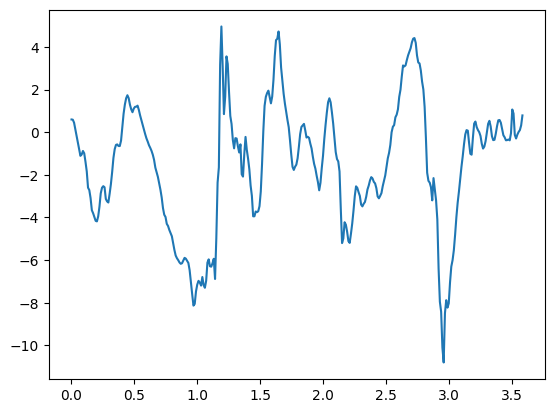

In [6]:
import matplotlib.pyplot as plt
#plt.plot(x,y)
x=df['Time (s)']
y=df['Linear Acceleration x (m/s^2)']
#plt.scatter(x,y,s=10)
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
#plt.xlim(0.9,1)

##### 2. Representación gráfica de los datos.
Con el siguiente código leemos los datos contenidos en el archivo **distance-table.csv** y trazamos una gráfica de la distancia sensor-objeto en función del tiempo transcurrido desde un instante inicial dado.
&nbsp;

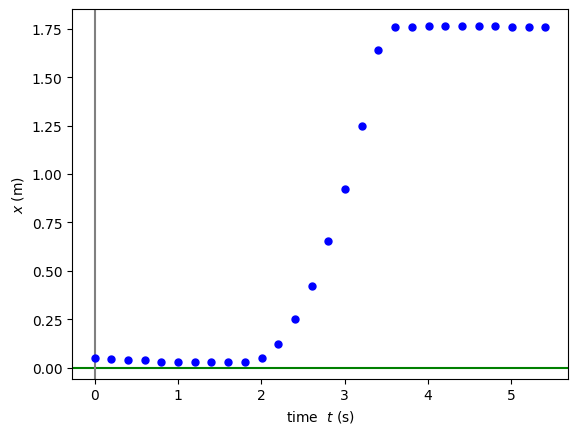

In [7]:
import numpy as np
import matplotlib.pyplot as plt
inputDataFile='distance-table.csv'
# read data from file
t, x = np.loadtxt(inputDataFile, delimiter =',', unpack = True)
# plot of the experimental data
plt.plot(t, x, 'o', color='blue', markersize = 5)
plt.axhline(color = 'green', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$x$ (m)')

print()
plt.show()
print()


##### 3. Velocidad Cálculo de Velocidad
Para calcular la velocidad consideramos los desplazamientos $\Delta x$ y la duración de los lapsos de tiempo $\Delta t$ entre dos mediciones posteriores. La velocidad promedio correspondiente a cada intervalo de tiempo se calcula como

$$ v = \dfrac{\Delta x}{\Delta t} $$

Asociamos dicho valor de velocidad promedio con el tiempo $t'$ obtenido como tiempo promedio en el intervalo $\Delta t$ considerado. Los valores calculados se guardan en el archivo **Incline-Speed.csv**

&nbsp;

In [21]:
# Nombre del archivo donde voy a grabar las velocidades
speedDataFile='/content/Incline-Speed.csv'

np.set_printoptions(precision=20)
# Calcula las diferencias entre puntos consecutivos
delta_t = np.diff(t)
delta_x = np.diff(x)
# Calculamos la velocidad
v = delta_x / delta_t
# t_prime le asigno un tiempo a esas velocidades como la mitad del intervalo
t_prime = t[:-1] + (delta_t/2)

# Guarda el archivo
np.savetxt(speedDataFile, np.column_stack((t_prime, v)))

##### 4. Gráfica de la velocidad en función del tiempo.
En una de las *celdas de código* anteriores de este Jupyter Notebook ya hemos *importado* el módulo **matplotlib**, por lo tanto, en las siguientes líneas de código podemos usar la función **plt.plot()** y otras funciones del módulo matplotlib para construir una gráfica de la velocidad en función del tiempo.

&nbsp;

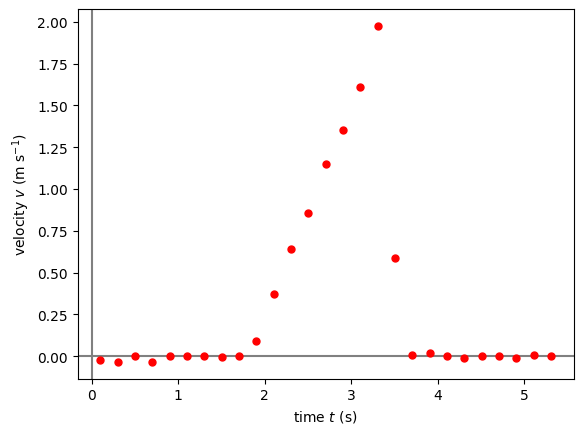

In [9]:
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.draw()
plt.show()#rename columns


##### 5. Calcular la aceleración
En este ejemplo, la aceleración del objeto que se mueve a lo largo del plano inclinado se calcula como la aceleración promedio correspondiente al intervalo de tiempo $\Delta t'$.

$$ a = \dfrac{\Delta v}{\Delta t'} $$

Asociamos cada valor de aceleración a un valor de tiempo que es el valor promedio del intervalo de tiempo correspondiente $\Delta t'$. Los datos se guardan en el archivo **Incline-Acceleration.csv**.

&nbsp;


In [25]:
accelerationDataFile='/content/Incline-Acceleration.csv'

np.set_printoptions(precision=20)
delta_t_prime = np.diff(t_prime)
delta_v = np.diff(v)
a = delta_v / delta_t_prime
t_double_prime = t_prime[:-1] + (delta_t_prime/2)

np.savetxt(accelerationDataFile, np.column_stack((t_double_prime, a)))

&nbsp;

Los valores obtenidos con este método se reportan en un gráfico.

&nbsp;

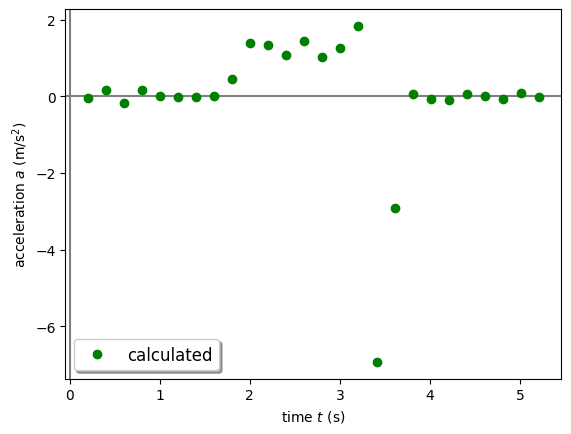

In [26]:
print()
#

plt.plot(t_double_prime, a, 'o', color='green', markersize = 6, label = 'calculated')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('acceleration $a$ (m/s$^{2}$)')
#plt.ylim(-1.5,1.5)
plt.legend(loc='lower left', shadow=True, fontsize='large')
plt.draw()
plt.show()

> Podemos observar que también se obtienen valores negativos de la aceleración.
> Estos valores corresponden al intervalo de tiempo en el que el objeto, después de haber recorrido la pista inclinada, es frenado intencionalmente contra un obstáculo blando.


##### 6. Análisis de datos sobre velocidad.

***6.1. Seleccionar un subconjunto de datos***

El número de pares (tiempo $t'$, velocidad $v$) viene dado por la dimensión de la matriz numpy correspondiente.


In [12]:
np.size(t_prime)

27

Queremos centrar el análisis en un rango temporal elegido. Para ello definimos dos **marcadores**, correspondiendo cada uno de ellos al valor del índice numérico que identifica el dato considerado.


Valores: 9, 17


interactive(children=(IntSlider(value=9, continuous_update=False, description='MarkerOne', max=26), IntSlider(…

<function __main__.calculate(MarkerOne, MarkerTwo)>

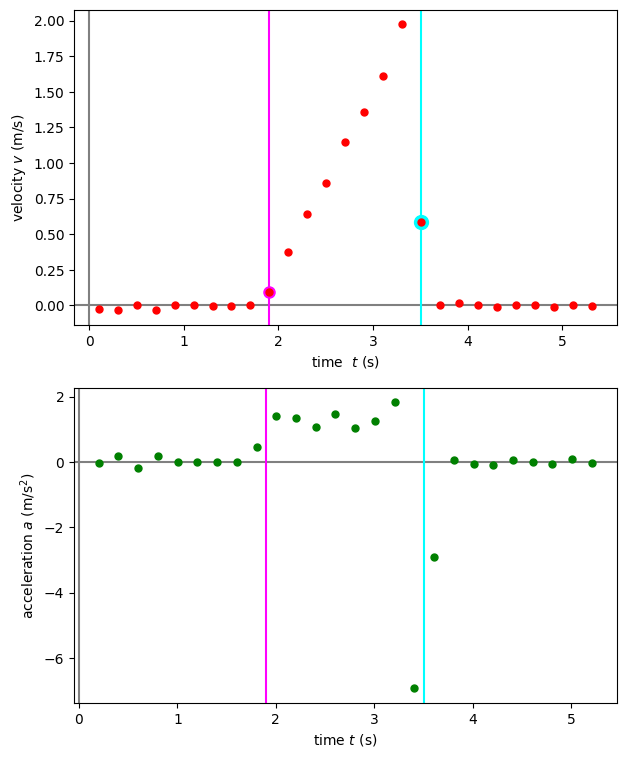

In [27]:
import ipywidgets as widgets

print()
print('Valores: 9, 17')

sliderMarkerOne = widgets.IntSlider(min = 0, max = (np.size(t_prime)-1), step = 1, value = 9, continuous_update = False)
sliderMarkerTwo = widgets.IntSlider(min = 0, max = (np.size(t_prime)-1), step = 1, value = 17, continuous_update = False)

def calculate(MarkerOne, MarkerTwo):
        print('Marker One = ',MarkerOne, '      Marker Two = ', MarkerTwo, '\n')
        MarkerOneTime = t_prime[MarkerOne]
        MarkerTwoTime = t_prime[MarkerTwo]
        print ('Time One', MarkerOneTime, 's', '      Time Two = ', MarkerTwoTime, '\n')
        makeplots(MarkerOne,MarkerTwo)
        t_subset = t_prime[MarkerOne:MarkerTwo]
        v_subset = v[MarkerOne:MarkerTwo]

def makeplots(MarkerOne, MarkerTwo):
    fig = plt.figure(figsize=(7, 9))
   # plt.ion()
    plt.subplot(2, 1, 1)
    plt.plot(t_prime, v, 'o', color='red', markersize = 5)
    plt.plot(t_prime[MarkerOne],v[MarkerOne], 'o', color='magenta', markersize = 8, zorder = -1)
    plt.plot(t_prime[MarkerTwo],v[MarkerTwo], 'o', color='cyan', markersize = 10, zorder = -1)
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.axvline(color = 'magenta', x = t_prime[MarkerOne], zorder = -1)
    plt.axvline(color = 'cyan', x = t_prime[MarkerTwo], zorder = -1)
    plt.xlabel('time  $t$ (s)')
    plt.ylabel('velocity $v$ (m/s)')
    #plt.text(27, 1.8, inputDataFile)


    plt.subplot(2, 1, 2)
    plt.plot(t_double_prime, a, 'o', color='green', markersize = 5)
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.axvline(color = 'magenta', x = t_prime[MarkerOne], zorder = -1)
    plt.axvline(color = 'cyan', x = t_prime[MarkerTwo], zorder = -1)
    plt.xlabel('time $t$ (s)')
    plt.ylabel('acceleration $a$ (m/s$^{2}$)')
   #plt.text(20, 0.2, speedDataFile)

widgets.interact(calculate, MarkerOne = sliderMarkerOne, MarkerTwo = sliderMarkerTwo)

&nbsp;

***6.2 Ajuste lineal de los datos de velocidad***

En una determinada región del gráfico de velocidad, el comportamiento de la velocidad en función del tiempo es lineal. Los valores de la velocidad obedecen a una ecuación de este tipo:

$$ v - v_0 = a (t- t_0) $$

Considerando que la velocidad inicial es cero, tenemos

$$ v = a (t- t_0) $$

y, equivalentemente,

$$ v = a t - a t_0 $$

La gráfica de la velocidad $v$ en función de $t$ se puede describir correspondiente a la ecuación de una recta, que en un plano cartesiano Oxy es

$$ y = A x + B $$

En el siguiente código Python definimos una función que permite calcular los parámetros $A$ y $B$ que proporcionan el mejor ajuste entre un conjunto de datos y una línea recta. che forniscono il miglior Accordo fra un insieme di dati e una retta. Aplicamos el algoritmo al conjunto de datos de velocidad correspondientes al rango de tiempo seleccionado y obtenemos

* el valor del parámetro A
     * que da una estimación de la **aceleración** $a$ en el intervalo de tiempo considerado
    
* el valor del parámetro B
     * del cual podemos obtener el valor de $t_0$, siendo
$$ t_0 = - \dfrac{B}{A} $$

&nbsp;

In [14]:
t_prime_subset = t_prime[sliderMarkerOne.value:sliderMarkerTwo.value]
v_subset = v[sliderMarkerOne.value:sliderMarkerTwo.value]

def LineFit(x,y):
    x_avg = x.mean()
    slope =  (y*(x-x_avg)).sum()/(x*(x-x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

a_est, v_intercept = LineFit(t_prime_subset, v_subset)


print('\n Estimated value of the acceleration (from the linear fit)')
print('\n a = {0:0.4} m/s^2 \n'.format(a_est))
#print('v_intercept', v_intercept, 'm/s', '\n')
t0 = -v_intercept/a_est
print(' t0 = {0:0.4} s \n'.format(t0))



 Estimated value of the acceleration (from the linear fit)

 a = 1.295 m/s^2 

 t0 = 1.829 s 



##### 7. Resumiendo los resultados en una figura: coordenada x, velocidad, aceleración

Queremos resumir los resultados obtenidos en una sola figura. Los gráficos están organizados como una matriz con tres filas y una columna.

&nbsp;


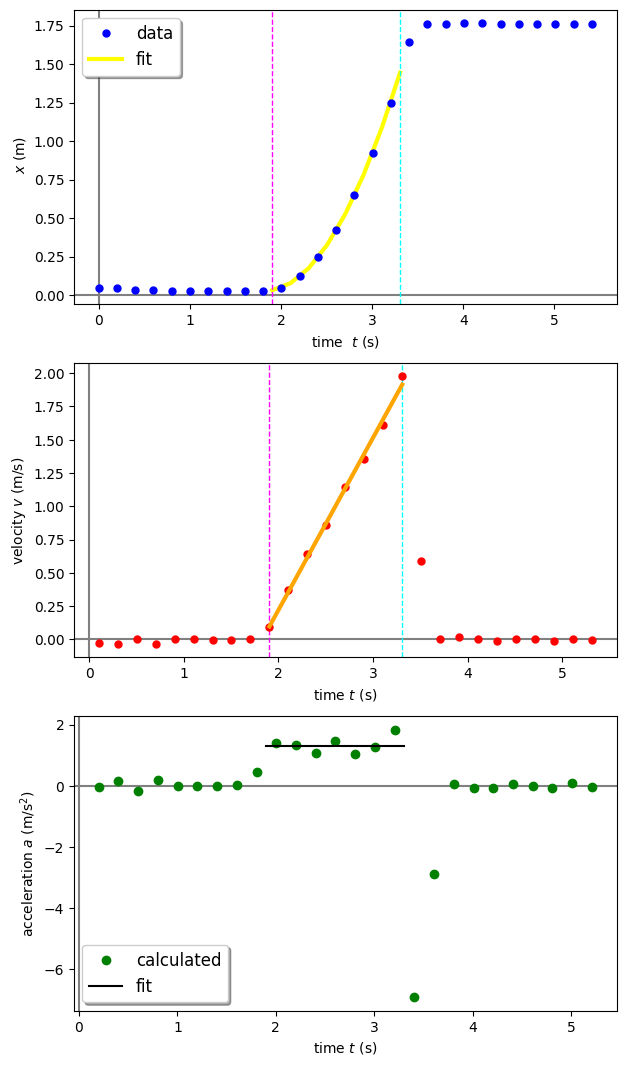

In [15]:
print()


v_fit = a_est * t_prime_subset + v_intercept


a_fit = v_fit/v_fit*a_est


x_fit = 0.5 *a_est * ( t_prime_subset - t0)**2 + 0.029


fig = plt.figure(figsize=(7, 13))
   # plt.ion()
plt.subplot(3, 1, 1)
plt.plot(t, x, 'o', color='blue', markersize = 5, label = 'data')
plt.plot(t_prime_subset,x_fit, '-', color='yellow', linewidth = 3, zorder = -1, label = 'fit')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_prime_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_prime_subset[-1],linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel(' $x$ (m)')
#plt.text(27, 1.8, inputDataFile)
plt.legend(loc='upper left', shadow=True, fontsize='large')


plt.subplot(3, 1, 2)
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.plot(t_prime_subset,v_fit,'-', color = 'orange', linewidth = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_prime_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_prime_subset[-1], linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m/s)')
#plt.text(20, 0.2, speedDataFile)

plt.subplot(3, 1, 3)
plt.plot(t_double_prime, a, 'o', color='green', markersize = 6, label = 'calculated')
plt.plot(t_prime_subset,a_fit, color = 'black', markersize = 3, label = 'fit')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('acceleration $a$ (m/s$^{2}$)')
#plt.ylim(-1.5,1.5)
plt.legend(loc='lower left', shadow=True, fontsize='large')
#plt.text(10, -1, accelerometerDataFile)

plt.savefig('Incline-Results.pdf')

plt.draw()
plt.show()
print()

* Los valores de la velocidad se muestran en el gráfico junto con la línea recta que mejor se aproxima a los datos experimentales en el intervalo de tiempo seleccionado. (**Trama 2/3**)

* La pendiente de esa línea recta da una estimación de la aceleración. Este valor constante de aceleración se muestra como una línea horizontal en **Gráfico 3/3** junto con todos los valores calculados de la aceleración en función del tiempo.

* Los valores experimentales de $x$ en función del tiempo se muestran en **Gráfico 1/3** junto con los valores calculados mediante la ecuación
$$ x = x_0 + \dfrac{1}{2} a (t - t_0)^2 $$
     * con los valores de $a$ y $t_0$ obtenidos del ajuste lineal de los datos de velocidad
     * y con el valor de $x_0$ que proporciona el mejor ajuste de la curva (parábola) a los valores experimentales de $x$ vs. $t$.
    
&nbsp;

##### 8. Comparación con las predicciones de un modelo
Si modelamos el sistema como un cuerpo puntual que se mueve **sin fricción** a lo largo del plano inclinado bajo la acción de la fuerza gravitacional, una vez conocido el ángulo de inclinación $\theta$, esperamos que el movimiento ocurra con * *aceleración constante** igual a

$$ g \sin(\theta) $$

donde $g$ es la aceleración de la gravedad.

En este caso,
*consideramos la medida del ángulo $\theta$ obtenida usando la App **phyphox**.
* convertimos el valor en **radianes**
* calculamos el **valor esperado** de la aceleración según el modelo

&nbsp;

In [16]:
theta_deg = 11
theta_rad = theta_deg / 180 * np.pi
print('\nInclination\n\n theta = {0:0.6} rad\n'.format(theta_rad))


Inclination

 theta = 0.191986 rad



In [17]:
np.sin(theta_rad)

0.1908089953765448

In [18]:
a_model = 9.8 * np.sin(theta_rad)

print()
print('Valor esperado de la aceleracion (para un plano inclinado sin friccion)\n')
print('a_model = {0:0.3f} m/s^2 \n'.format(a_model))

print()
print('Valor obtneido experimentalmente\n')
print('a_est =  {0:0.3f} m/s^2 \n'.format(a_est))
print()
relative_error = (a_model-a_est)/a_model
print('Error Realtivo  = {0:0.1f} %'.format(relative_error*100) )


Valor esperado de la aceleracion (para un plano inclinado sin friccion)

a_model = 1.870 m/s^2 


Valor obtneido experimentalmente

a_est =  1.295 m/s^2 


Error Realtivo  = 30.7 %
